In [82]:
from ipynb.fs.full.extracao import fetch_pokedex, damage_matrix, Types
import numpy as np
import pandas as pd
from enum import Enum
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn import tree

In [83]:
class BattleRole(Enum):
    Attacker = "Attacker"
    SPAttacker = "SPAttacker"
    Tank = "Tank"
    Balanced = "Balanced"

In [84]:
status_columns = ["base_hp", "base_attack", "base_defense", "base_special_attack", "base_special_defense", "base_speed"]
pokedex_df = fetch_pokedex()

In [85]:
pokedex_df.head()

,color,is_legendary,is_mythical,name,shape,image_url,base_hp,base_attack,base_defense,base_special_attack,base_special_defense,base_speed
0,green,False,False,bulbasaur,quadruped,https://raw.githubusercontent.com/PokeAPI/spri...,45,49,49,65,65,45
1,green,False,False,ivysaur,quadruped,https://raw.githubusercontent.com/PokeAPI/spri...,60,62,63,80,80,60
2,green,False,False,venusaur,quadruped,https://raw.githubusercontent.com/PokeAPI/spri...,80,82,83,100,100,80
3,red,False,False,charmander,upright,https://raw.githubusercontent.com/PokeAPI/spri...,39,52,43,60,50,65
4,red,False,False,charmeleon,upright,https://raw.githubusercontent.com/PokeAPI/spri...,58,64,58,80,65,80


In [86]:
pokemon_by_role = {
    "SPAttacker": ["gardevoir", "slowbro", "tangela", "manaphy", "sceptile", "gengar", "alakazam", "mew"],
    ##, "keldeo"
    "Attacker": ["crawdaunt", "talonflame", "garchomp", "weavile", "infernape"],
    "Balanced": ["excadrill", "tyranitar", "tangrowth", "scizor"],
    "Tank": ["clefable", "tyranitar", "gastrodon", "chansey", "gliscor"]
}

In [87]:
train_data = pd.DataFrame(
    columns=status_columns + ["role"]
)

In [88]:
for key in pokemon_by_role.keys():
    pokemons = pokemon_by_role[key]

    for pokemon in pokemons:
        pokemon_data = pokedex_df[pokedex_df["name"] == pokemon]
        row = {
            "role": key
        }
        for status in status_columns:
            row[status] = pokemon_data[status].values[0]
        row_series = pd.Series(row)
        train_data = pd.concat(
            [train_data, row_series.to_frame().T],
            ignore_index=True
        )

In [89]:
#SVM e Arvore de decisão
X_train, X_test, y_train, y_test = train_test_split(train_data[status_columns], train_data["role"], random_state=2)
pipeline = make_pipeline(StandardScaler(), LogisticRegression())
# pipeline = make_pipeline(svm.SVC())
# pipeline = make_pipeline(tree.DecisionTreeClassifier())
pipeline.fit(X_train, y_train)
pipeline.score(X_test, y_test)

0.8333333333333334

<AxesSubplot: >

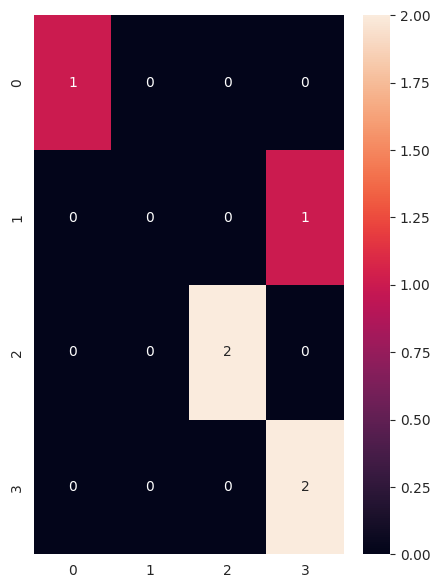

In [90]:
y_pred = pipeline.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (5,7))
sn.heatmap(conf_matrix, annot=True)

In [91]:
pokedex_df_sample = pokedex_df.sample(n = 10)
for idx in pokedex_df_sample.index:
    name = pokedex_df_sample.loc[idx]["name"]
    image = pokedex_df_sample.loc[idx]["image_url"]
    statuses = pokedex_df_sample.loc[idx][status_columns].to_frame().T
    print(name)
    print(image)
    print(pipeline.predict(statuses))

treecko
https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/252.png
['Attacker']
sentret
https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/161.png
['Balanced']
amaura
https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/698.png
['Tank']
sigilyph
https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/561.png
['SPAttacker']
magmar
https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/126.png
['SPAttacker']
aggron
https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/306.png
['Balanced']
linoone
https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/264.png
['Attacker']
sliggoo
https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/705.png
['SPAttacker']
hoothoot
https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/163.png
['Tank']
donphan
https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/232.

In [92]:
pipeline.predict(pokedex_df[pokedex_df["name"] == "blaziken"][status_columns])

array(['Attacker'], dtype=object)

In [93]:
pipeline.predict(pokedex_df[pokedex_df["name"] == "snorlax"][status_columns])

array(['Tank'], dtype=object)

In [94]:
pipeline.predict(pokedex_df[pokedex_df["name"] == "alakazam"][status_columns])

array(['SPAttacker'], dtype=object)